## Trabajo practico mentorias 2022. Entregable numero 2
### Integrantes:
    * Genolet, Franco
    * Bossack, Federico
    * Trevisan, Marilina
    * Chavez, Catalina

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import missingno as msno
import scipy.stats as st
import math

import seaborn
seaborn.set_context('talk')

In [2]:
#leer csv financial data
url = 'https://drive.google.com/file/d/1KllhxiCdNyGECp0A8nYbW8UTRA5jShsJ/view'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df_financial = pd.read_csv(dwn_url)

df_financial.head()

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],Class,year,2016 PRICE VAR [%],2017 PRICE VAR [%],2018 PRICE VAR [%],2019 PRICE VAR [%],AnualPriceVariation
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,...,-0.1746,Consumer Defensive,-9.323276,0,2014,NaN,NaN,NaN,NaN,-9.323276
1,VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,...,1.7313,Consumer Defensive,-25.512193,0,2014,NaN,NaN,NaN,NaN,-25.512193
2,KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,...,0.0234,Consumer Defensive,33.118297,1,2014,NaN,NaN,NaN,NaN,33.118297
3,RAD,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,...,-0.0060,Consumer Defensive,2.752291,1,2014,NaN,NaN,NaN,NaN,2.752291
4,GIS,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,...,-0.0220,Consumer Defensive,12.897715,1,2014,NaN,NaN,NaN,NaN,12.897715


In [3]:
interesting_columns = ['Unnamed: 0', 'Revenue', 'Cost of Revenue', 'Operating Expenses', 'Operating Income', 'Interest Expense', 'Net Income', 'EPS',
 'EPS Diluted', 'EBITDA', 'EBIT', 'Total current assets', 'Total non-current assets', 'Total assets', 'Total current liabilities', 'Total non-current liabilities',
 'Total liabilities', 'Total shareholders equity', 'Operating Cash Flow', 'returnOnAssets', 'returnOnEquity', 'returnOnCapitalEmployed',
 'Revenue per Share', 'Net Income per Share', 'Operating Cash Flow per Share', 'Market Cap', 'ROE', 'Net Income Growth', 'EPS Growth', 'EPS Diluted Growth', 'Sector', 'year', "Class", "AnualPriceVariation"]

df_financial_ic = df_financial[interesting_columns]
df_financial_ic = df_financial_ic.rename({'Unnamed: 0': 'ticker'}, axis=1)
print(f"Cant. Columnas: {len(df_financial_ic.columns.values)}")
print(f"Cant. datos: {len(df_financial_ic)}")
pd.options.display.float_format = '{:,.2f}'.format
df_financial_ic.head()

Cant. Columnas: 34
Cant. datos: 22077


,ticker,Revenue,Cost of Revenue,Operating Expenses,Operating Income,Interest Expense,Net Income,EPS,EPS Diluted,EBITDA,...,Operating Cash Flow per Share,Market Cap,ROE,Net Income Growth,EPS Growth,EPS Diluted Growth,Sector,year,Class,AnualPriceVariation
0,PG,"74,401,000,000.00","39,030,000,000.00","21,461,000,000.00","13,910,000,000.00","709,000,000.00","11,643,000,000.00",4.19,4.01,"18,344,000,000.00",...,5.16,"212,661,418,090.84",0.17,0.03,0.04,0.04,Consumer Defensive,2014,0,-9.32
1,VIPS,"3,734,148,046.50","2,805,625,443.98","793,926,703.26","134,595,899.26","12,148,692.28","135,822,731.68",0.24,0.23,"245,685,824.99",...,35.67,"6,253,200,000.00",0.33,1.56,1.46,1.46,Consumer Defensive,2014,0,-25.51
2,KR,"98,375,000,000.00","78,138,000,000.00","17,512,000,000.00","2,725,000,000.00","443,000,000.00","1,519,000,000.00",1.47,1.45,"4,416,000,000.00",...,3.48,"18,274,698,937.28",0.28,0.01,0.06,0.05,Consumer Defensive,2014,1,33.12
3,RAD,"25,526,413,000.00","18,202,679,000.00","6,586,482,000.00","737,252,000.00","424,591,000.00","249,414,000.00",4.60,4.60,"1,078,550,000.00",...,14.53,"6,359,738,316.40",-0.12,1.00,0.92,0.92,Consumer Defensive,2014,1,2.75
4,GIS,"17,909,600,000.00","11,539,800,000.00","3,412,400,000.00","2,957,400,000.00","302,400,000.00","1,824,400,000.00",2.90,2.83,"3,595,500,000.00",...,4.14,"33,330,057,253.44",0.28,-0.02,0.01,0.01,Consumer Defensive,2014,1,12.90


### Analisis de datos faltantes y erroneos

In [4]:
def status(data):
    data2=data 
    # total de rows
    tot_rows=len(data2)
    # total de nan
    d2=data2.isnull().sum().reset_index()
    d2.columns=['variable', 'q_nan']
    # percentage of nan
    d2[['p_nan']]=d2[['q_nan']]/tot_rows
    # num of zeros
    d2['q_zeros']=(data2==0).sum().values
    # perc of zeros
    d2['p_zeros']=d2[['q_zeros']]/tot_rows
    # total unique values
    d2['unique']=data2.nunique().values
    # get data types per column
    d2['type']=[str(x) for x in data2.dtypes.values]
    
    return(d2)

In [5]:
status(df_financial_ic)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,ticker,0,0.00,0,0.00,4980,object
1,Revenue,1171,0.05,937,0.04,19417,float64
2,Cost of Revenue,1771,0.08,4346,0.20,15549,float64
3,Operating Expenses,1702,0.08,81,0.00,19518,float64
4,Operating Income,1101,0.05,32,0.00,19793,float64
5,Interest Expense,1719,0.08,5193,0.24,11866,float64
6,Net Income,1565,0.07,43,0.00,19073,float64
7,EPS,1301,0.06,91,0.00,4139,float64
8,EPS Diluted,1292,0.06,91,0.00,4109,float64
9,EBITDA,1754,0.08,9,0.00,19443,float64


In [6]:
print(f"nulls values:\n{df_financial_ic.isnull().sum().sort_values(ascending=False)}")
#df_financial_ic.describe()

nulls values:
returnOnAssets                   6535
returnOnCapitalEmployed          6509
Total non-current liabilities    6036
Total non-current assets         6022
Market Cap                       3071
Total current liabilities        2528
Total current assets             2522
Net Income per Share             2445
Revenue per Share                2443
Operating Cash Flow per Share    2413
Net Income Growth                2382
ROE                              2340
returnOnEquity                   2338
EPS Diluted Growth               2193
EPS Growth                       2183
Cost of Revenue                  1771
EBITDA                           1754
Interest Expense                 1719
Operating Expenses               1702
Net Income                       1565
EBIT                             1425
Total liabilities                1396
Total shareholders equity        1372
Total assets                     1305
EPS                              1301
EPS Diluted                      129

**Tratamiento a cada columna:**
  

Decidimos eliminar las siguientes columnas:
1. Por un lado:
  * returnOnAssets                   
  * returnOnCapitalEmployed          
  * Total non-current liabilities    
  * Total non-current assets  
Ya que tiene muchos datos nulos y guardan mucha relacion con otras variables predictoras, para evitar la multicolinealidad (la multicolinealidad es la relación de dependencia lineal fuerte entre más de dos variables explicativas en una regresión múltiple)

2. Todas las varibles que digan "per Share", excepto *total share holders equity*. 

3. EPS ya que utilizamos el indicador EPS diluited. 

4. Las variables a predecir serán:
- AnualPriceVariation: Nos indica la variacion anual que tuvo el precio de la accion respecto al año anterior.
- Class: Variable binaria (0 o 1). Si es 0 AnualPriceVariation es negativa, es decir, el precio de la accion disminuyo. Por el contrario, si es 1 indica que aumentó. 

In [7]:
interesting_columns_new=[]
columnas_eliminar = ['returnOnAssets', 'returnOnCapitalEmployed','EPS','Total non-current liabilities','Total non-current assets',
                    'Revenue per Share', 'Net Income per Share', 'Operating Cash Flow per Share','3Y Revenue Growth (per Share)']
featureClass = 'Class'
featureAPV = "AnualPriceVariation"

for i in df_financial_ic.columns.values.tolist():
  if (i not in columnas_eliminar) and (i!=featureClass) and (i!=featureAPV):
    interesting_columns_new.append(i)

df_financial_ic_n = df_financial_ic[interesting_columns_new]
df_financial_ic_n.head()

,ticker,Revenue,Cost of Revenue,Operating Expenses,Operating Income,Interest Expense,Net Income,EPS Diluted,EBITDA,EBIT,...,Total shareholders equity,Operating Cash Flow,returnOnEquity,Market Cap,ROE,Net Income Growth,EPS Growth,EPS Diluted Growth,Sector,year
0,PG,"74,401,000,000.00","39,030,000,000.00","21,461,000,000.00","13,910,000,000.00","709,000,000.00","11,643,000,000.00",4.01,"18,344,000,000.00","15,203,000,000.00",...,"69,976,000,000.00","13,958,000,000.00",0.17,"212,661,418,090.84",0.17,0.03,0.04,0.04,Consumer Defensive,2014
1,VIPS,"3,734,148,046.50","2,805,625,443.98","793,926,703.26","134,595,899.26","12,148,692.28","135,822,731.68",0.23,"245,685,824.99","187,530,997.74",...,"412,354,536.65","526,745,560.22",0.33,"6,253,200,000.00",0.33,1.56,1.46,1.46,Consumer Defensive,2014
2,KR,"98,375,000,000.00","78,138,000,000.00","17,512,000,000.00","2,725,000,000.00","443,000,000.00","1,519,000,000.00",1.45,"4,416,000,000.00","2,713,000,000.00",...,"5,384,000,000.00","3,573,000,000.00",0.28,"18,274,698,937.28",0.28,0.01,0.06,0.05,Consumer Defensive,2014
3,RAD,"25,526,413,000.00","18,202,679,000.00","6,586,482,000.00","737,252,000.00","424,591,000.00","249,414,000.00",4.60,"1,078,550,000.00","674,809,000.00",...,"-2,113,702,000.00","702,046,000.00",-0.12,"6,359,738,316.40",-0.12,1.00,0.92,0.92,Consumer Defensive,2014
4,GIS,"17,909,600,000.00","11,539,800,000.00","3,412,400,000.00","2,957,400,000.00","302,400,000.00","1,824,400,000.00",2.83,"3,595,500,000.00","3,010,100,000.00",...,"6,534,800,000.00","2,541,000,000.00",0.28,"33,330,057,253.44",0.28,-0.02,0.01,0.01,Consumer Defensive,2014


**Verficamos tipos de variables.**

In [8]:
df_financial_ic_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22077 entries, 0 to 22076
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ticker                     22077 non-null  object 
 1   Revenue                    20906 non-null  float64
 2   Cost of Revenue            20306 non-null  float64
 3   Operating Expenses         20375 non-null  float64
 4   Operating Income           20976 non-null  float64
 5   Interest Expense           20358 non-null  float64
 6   Net Income                 20512 non-null  float64
 7   EPS Diluted                20785 non-null  float64
 8   EBITDA                     20323 non-null  float64
 9   EBIT                       20652 non-null  float64
 10  Total current assets       19555 non-null  float64
 11  Total assets               20772 non-null  float64
 12  Total current liabilities  19549 non-null  float64
 13  Total liabilities          20681 non-null  flo

In [9]:
var_numericas = ['Revenue', 'Cost of Revenue', 'Operating Expenses','Operating Income', 'Interest Expense', 'Net Income',
       'EPS Diluted', 'EBITDA', 'EBIT', 'Total current assets','Total assets', 'Total current liabilities', 'Total liabilities',
       'Total shareholders equity', 'Operating Cash Flow','returnOnEquity', 'Market Cap', 'ROE', 'Net Income Growth',
       'EPS Growth', 'EPS Diluted Growth']
df_financial_ic_n['year'] = df_financial_ic_n['year'].astype(str)
var_categoricas = ['Sector', 'year']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [10]:
# imputing with amost_frequent

from sklearn.impute import SimpleImputer
df_financial_ic_n_mean = df_financial_ic_n.copy()

In [11]:
mean_imputer = SimpleImputer(strategy='mean') # strategy can also be mean or median or most_frequent

df_financial_ic_n_mean[var_numericas] = mean_imputer.fit_transform(df_financial_ic_n_mean[var_numericas])
# msno.bar(df_financial_ic_n_mean,figsize=(12, 6), fontsize=12, color='steelblue')

In [12]:
df_financial_ic_n_mean

,ticker,Revenue,Cost of Revenue,Operating Expenses,Operating Income,Interest Expense,Net Income,EPS Diluted,EBITDA,EBIT,...,Total shareholders equity,Operating Cash Flow,returnOnEquity,Market Cap,ROE,Net Income Growth,EPS Growth,EPS Diluted Growth,Sector,year
0,PG,"74,401,000,000.00","39,030,000,000.00","21,461,000,000.00","13,910,000,000.00","709,000,000.00","11,643,000,000.00",4.01,"18,344,000,000.00","15,203,000,000.00",...,"69,976,000,000.00","13,958,000,000.00",0.17,"212,661,418,090.84",0.17,0.03,0.04,0.04,Consumer Defensive,2014
1,VIPS,"3,734,148,046.50","2,805,625,443.98","793,926,703.26","134,595,899.26","12,148,692.28","135,822,731.68",0.23,"245,685,824.99","187,530,997.74",...,"412,354,536.65","526,745,560.22",0.33,"6,253,200,000.00",0.33,1.56,1.46,1.46,Consumer Defensive,2014
2,KR,"98,375,000,000.00","78,138,000,000.00","17,512,000,000.00","2,725,000,000.00","443,000,000.00","1,519,000,000.00",1.45,"4,416,000,000.00","2,713,000,000.00",...,"5,384,000,000.00","3,573,000,000.00",0.28,"18,274,698,937.28",0.28,0.01,0.06,0.05,Consumer Defensive,2014
3,RAD,"25,526,413,000.00","18,202,679,000.00","6,586,482,000.00","737,252,000.00","424,591,000.00","249,414,000.00",4.60,"1,078,550,000.00","674,809,000.00",...,"-2,113,702,000.00","702,046,000.00",-0.12,"6,359,738,316.40",-0.12,1.00,0.92,0.92,Consumer Defensive,2014
4,GIS,"17,909,600,000.00","11,539,800,000.00","3,412,400,000.00","2,957,400,000.00","302,400,000.00","1,824,400,000.00",2.83,"3,595,500,000.00","3,010,100,000.00",...,"6,534,800,000.00","2,541,000,000.00",0.28,"33,330,057,253.44",0.28,-0.02,0.01,0.01,Consumer Defensive,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22072,YRIV,0.00,0.00,"3,755,251.00","-3,755,251.00","11,058,486.00","-13,716,485.00",-0.08,"-3,757,783.00","-3,766,024.00",...,"171,412,244.00","-6,299,496.00",-0.08,"683,228,957.40",-0.08,-0.12,-0.33,-0.33,Real Estate,2018
22073,YTEN,"556,000.00",0.00,"9,830,000.00","-9,274,000.00",0.00,"-9,170,000.00",-0.92,"-8,974,000.00","-9,170,000.00",...,"5,698,000.00","-8,754,000.00",-1.61,"8,321,423.13",-1.61,0.15,0.72,0.72,Basic Materials,2018
22074,ZKIN,"54,884,381.00","36,593,792.00","8,672,953.00","9,617,636.00","1,239,170.00","7,018,114.00",0.52,"10,063,235.00","9,655,494.00",...,"37,041,845.00","-2,234,995.00",0.19,"30,560,346,775.25",0.19,0.19,-0.07,-0.07,Basic Materials,2018
22075,ZOM,0.00,0.00,"16,648,628.00","-16,648,628.00",0.00,"-16,647,687.00",-0.18,"-16,441,920.00","-16,647,687.00",...,"3,657,000.00","-11,147,528.00",-4.55,"116,599,337.07",-4.55,-1.06,-1.00,-1.00,Industrials,2018


In [13]:
status(df_financial_ic_n_mean)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,ticker,0,0.00,0,0.00,4980,object
1,Revenue,0,0.00,937,0.04,19418,float64
2,Cost of Revenue,0,0.00,4346,0.20,15550,float64
3,Operating Expenses,0,0.00,81,0.00,19519,float64
4,Operating Income,0,0.00,32,0.00,19794,float64
5,Interest Expense,0,0.00,5193,0.24,11867,float64
6,Net Income,0,0.00,43,0.00,19074,float64
7,EPS Diluted,0,0.00,91,0.00,4110,float64
8,EBITDA,0,0.00,9,0.00,19444,float64
9,EBIT,0,0.00,44,0.00,19411,float64


### One hot encoding encoding sobre sector, industria, year.
Con el motivo de añadir variables categoricas como feature predictora. Se hara un one-hot encoding para poder transformarlas de modo que pueden suministrarse como variables al futuro modelo

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
df_financial_ic_n_mean.reset_index
df_financial_ic_n_mean.head(10)

,ticker,Revenue,Cost of Revenue,Operating Expenses,Operating Income,Interest Expense,Net Income,EPS Diluted,EBITDA,EBIT,...,Total shareholders equity,Operating Cash Flow,returnOnEquity,Market Cap,ROE,Net Income Growth,EPS Growth,EPS Diluted Growth,Sector,year
0,PG,"74,401,000,000.00","39,030,000,000.00","21,461,000,000.00","13,910,000,000.00","709,000,000.00","11,643,000,000.00",4.01,"18,344,000,000.00","15,203,000,000.00",...,"69,976,000,000.00","13,958,000,000.00",0.17,"212,661,418,090.84",0.17,0.03,0.04,0.04,Consumer Defensive,2014
1,VIPS,"3,734,148,046.50","2,805,625,443.98","793,926,703.26","134,595,899.26","12,148,692.28","135,822,731.68",0.23,"245,685,824.99","187,530,997.74",...,"412,354,536.65","526,745,560.22",0.33,"6,253,200,000.00",0.33,1.56,1.46,1.46,Consumer Defensive,2014
2,KR,"98,375,000,000.00","78,138,000,000.00","17,512,000,000.00","2,725,000,000.00","443,000,000.00","1,519,000,000.00",1.45,"4,416,000,000.00","2,713,000,000.00",...,"5,384,000,000.00","3,573,000,000.00",0.28,"18,274,698,937.28",0.28,0.01,0.06,0.05,Consumer Defensive,2014
3,RAD,"25,526,413,000.00","18,202,679,000.00","6,586,482,000.00","737,252,000.00","424,591,000.00","249,414,000.00",4.60,"1,078,550,000.00","674,809,000.00",...,"-2,113,702,000.00","702,046,000.00",-0.12,"6,359,738,316.40",-0.12,1.00,0.92,0.92,Consumer Defensive,2014
4,GIS,"17,909,600,000.00","11,539,800,000.00","3,412,400,000.00","2,957,400,000.00","302,400,000.00","1,824,400,000.00",2.83,"3,595,500,000.00","3,010,100,000.00",...,"6,534,800,000.00","2,541,000,000.00",0.28,"33,330,057,253.44",0.28,-0.02,0.01,0.01,Consumer Defensive,2014
5,PM,"80,106,000,000.00","60,775,000,000.00","7,629,000,000.00","11,702,000,000.00","1,052,000,000.00","7,493,000,000.00",4.76,"12,531,000,000.00","11,642,000,000.00",...,"-12,629,000,000.00","7,739,000,000.00",-0.59,"126,550,098,153.00",-0.59,-0.13,-0.10,-0.10,Consumer Defensive,2014
6,KO,"45,998,000,000.00","17,889,000,000.00","18,401,000,000.00","9,708,000,000.00","483,000,000.00","7,098,000,000.00",1.60,"11,758,000,000.00","9,782,000,000.00",...,"30,320,000,000.00","10,615,000,000.00",0.23,"184,928,364,569.22",0.23,-0.17,-0.16,-0.16,Consumer Defensive,2014
7,WMT,"476,294,000,000.00","358,069,000,000.00","91,353,000,000.00","26,872,000,000.00","2,335,000,000.00","16,022,000,000.00",4.88,"35,332,000,000.00","26,462,000,000.00",...,"76,255,000,000.00","23,257,000,000.00",0.21,"241,647,485,072.40",0.21,-0.06,-0.03,-0.03,Consumer Defensive,2014
8,MDLZ,"34,244,000,000.00","21,647,000,000.00","9,355,000,000.00","3,242,000,000.00","688,000,000.00","2,184,000,000.00",1.28,"4,284,000,000.00","3,225,000,000.00",...,"27,750,000,000.00","3,562,000,000.00",0.08,"61,031,608,766.10",0.08,-0.44,-0.42,-0.42,Consumer Defensive,2014
9,MO,"24,522,000,000.00","14,362,000,000.00","2,540,000,000.00","7,620,000,000.00","808,000,000.00","5,070,000,000.00",2.56,"8,790,000,000.00","8,582,000,000.00",...,"3,014,000,000.00","4,663,000,000.00",1.68,"97,380,679,954.74",1.68,0.12,0.13,0.13,Consumer Defensive,2014


In [16]:
dummy_year = pd.get_dummies(df_financial_ic_n_mean['year'], prefix = "Año")

In [17]:
dummy_year.head()

,Año_2014,Año_2015,Año_2016,Año_2017,Año_2018
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [18]:
dummy_sector = pd.get_dummies(df_financial_ic_n_mean['Sector'])
dummy_sector.head()

,Basic Materials,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [19]:
df_financial_ic_n_mean = df_financial_ic_n_mean.drop(['year', 'Sector'], axis =1)

In [20]:
definitive_financial =  pd.concat([df_financial_ic_n_mean, dummy_sector, dummy_year], axis =1)
definitive_financial.head()

,ticker,Revenue,Cost of Revenue,Operating Expenses,Operating Income,Interest Expense,Net Income,EPS Diluted,EBITDA,EBIT,...,Healthcare,Industrials,Real Estate,Technology,Utilities,Año_2014,Año_2015,Año_2016,Año_2017,Año_2018
0,PG,"74,401,000,000.00","39,030,000,000.00","21,461,000,000.00","13,910,000,000.00","709,000,000.00","11,643,000,000.00",4.01,"18,344,000,000.00","15,203,000,000.00",...,0,0,0,0,0,1,0,0,0,0
1,VIPS,"3,734,148,046.50","2,805,625,443.98","793,926,703.26","134,595,899.26","12,148,692.28","135,822,731.68",0.23,"245,685,824.99","187,530,997.74",...,0,0,0,0,0,1,0,0,0,0
2,KR,"98,375,000,000.00","78,138,000,000.00","17,512,000,000.00","2,725,000,000.00","443,000,000.00","1,519,000,000.00",1.45,"4,416,000,000.00","2,713,000,000.00",...,0,0,0,0,0,1,0,0,0,0
3,RAD,"25,526,413,000.00","18,202,679,000.00","6,586,482,000.00","737,252,000.00","424,591,000.00","249,414,000.00",4.60,"1,078,550,000.00","674,809,000.00",...,0,0,0,0,0,1,0,0,0,0
4,GIS,"17,909,600,000.00","11,539,800,000.00","3,412,400,000.00","2,957,400,000.00","302,400,000.00","1,824,400,000.00",2.83,"3,595,500,000.00","3,010,100,000.00",...,0,0,0,0,0,1,0,0,0,0


In [21]:
status(definitive_financial)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,ticker,0,0.00,0,0.00,4980,object
1,Revenue,0,0.00,937,0.04,19418,float64
2,Cost of Revenue,0,0.00,4346,0.20,15550,float64
3,Operating Expenses,0,0.00,81,0.00,19519,float64
4,Operating Income,0,0.00,32,0.00,19794,float64
5,Interest Expense,0,0.00,5193,0.24,11867,float64
6,Net Income,0,0.00,43,0.00,19074,float64
7,EPS Diluted,0,0.00,91,0.00,4110,float64
8,EBITDA,0,0.00,9,0.00,19444,float64
9,EBIT,0,0.00,44,0.00,19411,float64


Resta determinar que hacemos con la variable "Ticker". En principio no seria utilizado como variable predictora

### Principal Components Analisys con Sk-Learn
#### PCA es un algoritmo que permite disminuir la dimensionalidad de la matriz de variables predictoras, a traves de la extraccion de variables, generando nuevas variables que tengan independencia entre ellas. 
* Para ello, como primer medida, sacaremos a Ticker como feature, y nos centraremos en la variable a predecir: Anual Price Variation

In [22]:
X = definitive_financial.drop('ticker', axis=1)

In [23]:
Y = df_financial_ic["AnualPriceVariation"]

In [24]:
# Escalar para que las variables tengan el mismo peso
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 10, random_state=42)
X_pca = pca.fit_transform(X_std)

In [26]:
pca.explained_variance_ratio_

array([0.19163443, 0.06079016, 0.05405522, 0.03909538, 0.0350478 ,
       0.03424039, 0.03346909, 0.03277045, 0.03177154, 0.03106781])

(0.0, 1.1)

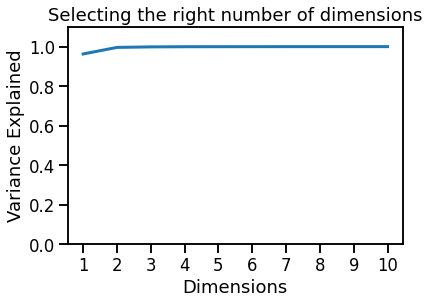

In [27]:
pca = PCA(n_components= 10, random_state=42)
pca.fit(X)

cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.arange(len(cumsum))+1

plt.plot(dim,cumsum,'-',lw=3);

plt.xlabel('Dimensions')
plt.ylabel('Variance Explained')
plt.title('Selecting the right number of dimensions')

plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.ylim([0,1.1])

### Como se puede observar en el grafico anterior, reduciendo a 2 componentes principales, se puede explicar mas del 90% de la varianza de los datos. Lo cual podria ser explicado por la gran dependencia y correlacion entre las variables

In [28]:
pca = PCA(n_components= 2, random_state=42)
X_pca = pca.fit_transform(X_std)

In [29]:
X_pca

array([[ 9.41396021e+00, -2.40320021e+00],
       [-3.21905794e-01, -3.41157211e-01],
       [ 3.50371453e+00, -3.09598857e+00],
       ...,
       [-6.32447671e-01, -2.32496437e-02],
       [-6.49303661e-01,  6.91441221e-03],
       [-6.63621561e-01,  4.29729244e-02]])